# Project: Investigate a Dataset (Medical_appointment!)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
#import important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read_the data
df_Medical=pd.read_csv('Medical_appointment.csv')
df_Medical.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


### Medical Appointment Dataset that show if the Paients will go to their appointment or not, With 14 assoiacated variables which are
### 1-PatientId : Id of the Patient
### 2-AppointmentID: Id of each appointment
### 3-Gender: Male or Female
### 4-ScheduledDay: Day of the registration of the appointment
### 5-AppointmentDay: Day of the appointment when the have to visit the doctor
### 6-Age: Age of the Paient
### 7-Neighbourhood: Place of the appointment
### 8-Scholarship: If the paitent enrolled in a Scholarship programm or not
### 9-Hipertension: Indicates if patient have hipertension
### 10-Diabetes: Indicates if patient have diabetes
### 11-Alcoholism: Indicates if patient have alcoholism
### 12-Handcap: Indicates how many disabilities condition have
### 13-SMS_received: If the patient recieved an sms or not
### 14-No-show: Indicate if the patient attend the appointment or not

# 

# Examples of Questions to explore the Data
### Question 1: How the age of the patient is affecting the patients presence?
### Question 2: Do SMS reminder decrease the number of absence?
### Question 3: Do Scholarship program Force patients to attend the appointment?

<a id='wrangling'></a>
## Data Wrangling

In [3]:
#print the shape of the Dataset to know the number of columns and rows,.
df_Medical.shape

(110527, 14)

Medical_appointment Dataset have 110527 rows and 14 columns

In [4]:
#print some info for the Dataset to make sure there are no missing values.
df_Medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing data are found

In [5]:
#print the sum of the duplicated data.
sum(df_Medical.duplicated())

0

No duplicatd data found

In [6]:
#print the number of unique vaule for each variables
df_Medical.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
#Describe the Medical appointment dataset
df_Medical.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Data Cleaning
### Dropout the PatientId and AppointmentID columns as they are not affecting the attendace of the apointment

In [8]:
#drop the PatientId and AppointmentID columns from the Dataset 
df_Medical.drop(['PatientId','AppointmentID'] , axis=1, inplace=True)


### Print the Dataset to make sure the undesired columns are removed


In [9]:
df_Medical.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


### Replace the name of the column 'No-show' by 'Present' as well as replcae the rows by 1: 'yes attend' and 0: 'Not attend' to make it more clear and esay to understand.

In [10]:
df_Medical.rename(columns={'No-show':'Present'},inplace=True)
df_Medical.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [11]:
df_Medical['Present'].replace({'No': 1, 'Yes': 0 }, inplace=True)
df_Medical.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,1
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,0
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,0
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,1
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,1


### Explore more the AppointmentDay Column

In [12]:
#print some values of the 'AppointmentDay' 
df_Medical['AppointmentDay'].tail(20)

110507    2016-06-08T00:00:00Z
110508    2016-06-01T00:00:00Z
110509    2016-06-08T00:00:00Z
110510    2016-06-01T00:00:00Z
110511    2016-06-08T00:00:00Z
110512    2016-06-08T00:00:00Z
110513    2016-06-08T00:00:00Z
110514    2016-06-08T00:00:00Z
110515    2016-06-08T00:00:00Z
110516    2016-06-08T00:00:00Z
110517    2016-06-07T00:00:00Z
110518    2016-06-07T00:00:00Z
110519    2016-06-07T00:00:00Z
110520    2016-06-07T00:00:00Z
110521    2016-06-07T00:00:00Z
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, dtype: object

In [13]:
df_Medical[df_Medical['AppointmentDay'].str.contains('T00:00:00Z')]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [14]:
df_Medical['AppointmentDay'].str.contains('T00:00:00Z').sum()

110527

### All the AppointmentDay columns have a fixed appointment time

In [15]:
df_Medical.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
Present            int64
dtype: object

In [16]:
#Change the AppontmentDay data type to datetime
df_Medical['AppointmentDay']=df_Medical['AppointmentDay'].astype('datetime64')


In [17]:
#Change the ScheduledDay data type to datetime
df_Medical['ScheduledDay']=df_Medical['ScheduledDay'].astype('datetime64')


In [18]:
#Print the Data to make sure the 'AppointmentDay' and 'ScheduledDay' variable data type are successfully changed to datetime
df_Medical.head(20)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0
8,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,1
9,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,1


In [19]:
df_Medical.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
Present                    int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

In [20]:
df_Medical

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [21]:
#print the unique values of 'Handcap' variable 
df_Medical['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [22]:
df_Medical.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [23]:
#indicate the number of patients show at their appointment or not.
df_Medical.Present.value_counts()

1    88208
0    22319
Name: Present, dtype: int64

In [24]:
#indicate the number of patients who recieved an sms or not.
df_Medical.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

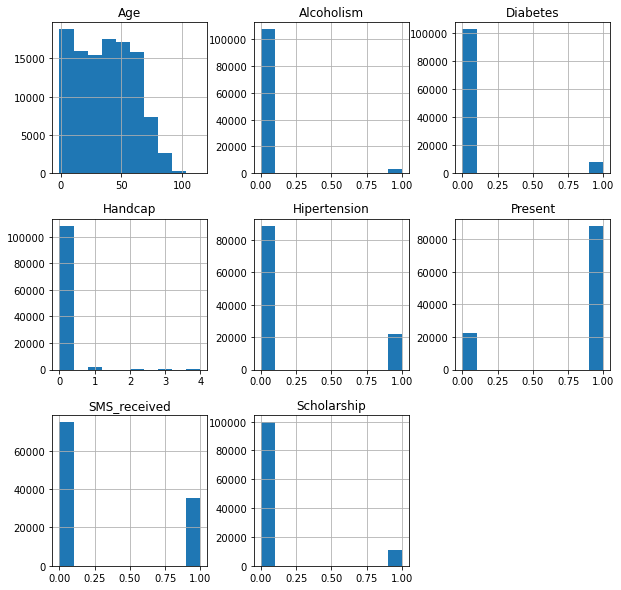

In [25]:
#plot the variables of the data.
df_Medical.hist(figsize=(10,10));

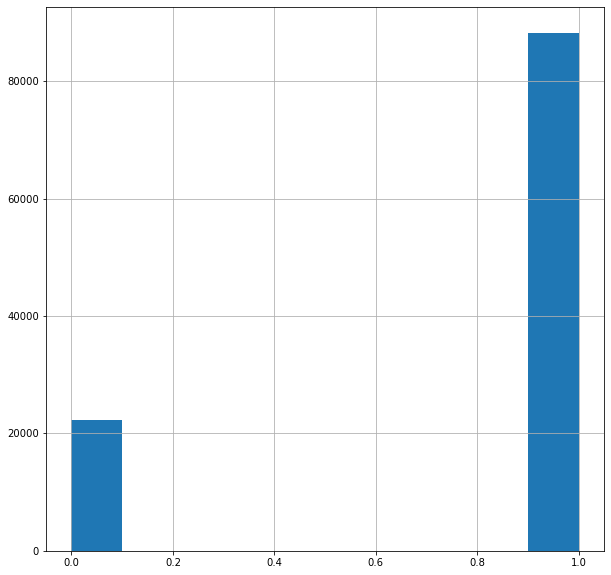

In [26]:
#Plot to see How big differnece between presenting at the appointments and absence 
df_Medical['Present'].hist(figsize=(10,10))

### It appear to be a problem about 20 precentage of the patient no show to the appointments

# 

In [27]:
Present=df_Medical.Present==1
didnot_Present=df_Medical.Present==0

In [28]:
#Mean age of the patients present at their appointmnet
df_Medical.Age[Present].mean()

37.790064393252315

In [29]:
##Mean age of the patients No show at their appointmnet
df_Medical.Age[didnot_Present].mean()

34.31766656212196

# How age is affecting the patients presence?

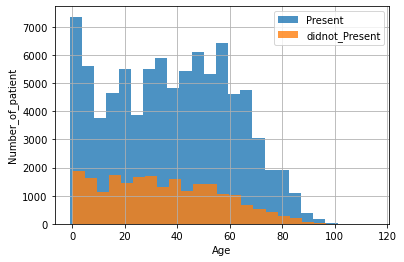

In [93]:
df_Medical.Age[Present].hist(alpha=0.8,bins=25,label='Present')
df_Medical.Age[didnot_Present].hist(alpha=0.8,bins=25,label='didnot_Present')
plt.xlabel('Age')
plt.ylabel('Number_of_patient')
plt.legend();

### There is no revelant difference between distribution of age between Patients who showed at the appointment and who didn't show at the appointment

# 

In [94]:
#function to generate plot
def generate_plot(feature,kind,title,y_label):
    plot=df_Medical.groupby(feature).Present.mean()
    ax = plot.plot(kind = kind)
    ax.set_title(title)
    ax.set_ylabel(y_label)



# How are the SMS reminders affect the number of absence?


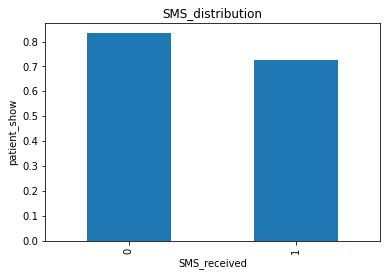

In [100]:
generate_plot('SMS_received','bar','SMS_distribution','patient_show')

### Patients that appears on appointments, mostly don't receive any sms. It seems that receive or no a sms don't affects directly the number of absence.

# 

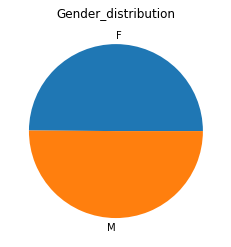

In [97]:
#Relationship between present at appointments and certain gender
generate_plot('Gender','pie','Gender_distribution','')

### No relationship between present at the appointment and the gender.

#  

# Do Scholarship Force patients to attend the appointment?

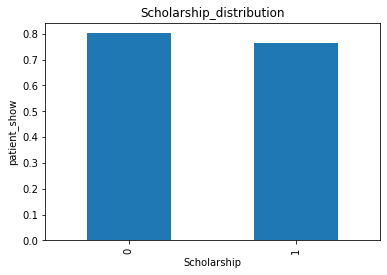

In [101]:
generate_plot('Scholarship','bar','Scholarship_distribution','patient_show')


### Scholarship program does not force Patients to attend the appointment, Patients who didn't enrolled in the scholarship are showed more in their appointment.

# 

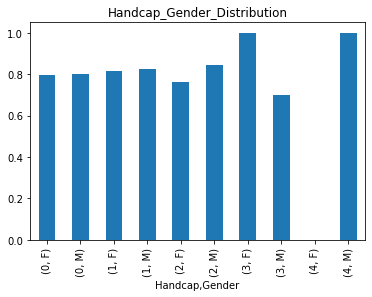

In [112]:
#the relashion between the number of the handcap does the patient have and the gender if they show at their appointment or not.
df_Medical.groupby(['Handcap','Gender']).Present.mean().plot(kind='bar',title='Handcap_Gender_Distribution');

### It appear that paient who have a high number of hancap instead of his gender show more at the appointment

# 

<a id='conclusions'></a>
## Conclusions


###  I have found that there is no revelant difference between distribution of age between Patients who showed at the appointment and who didn't show at the appointment. 
### Also, Scholarship program does not force Patients to attend the appointment, Patients who didn't enrolled in the scholarship are showed more in their appointment.
### Patients showed at their appointments, Mostly did'nt receive any sms. It seems that receive or not recieve an sms don't affects directly the number of absence.
### In addition to that there are no relationship between present at the appointment and the gender.
### It appear that paient who have a high number of hancap instead of his gender show more at the appointment.

# 

# Limitations

### It's a good idea to see how far the days between the ScheduledDay and the AppointmentDay is affecting the patients presence


In [ ]:
# Issues with the da